In [1]:
#IMPOTING NECESSARY LIBRARIES 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# ENTIRE DATASET
df = pd.read_csv("spam-2.csv")

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [6]:
df.shape

(5572, 5)

In [7]:
df["v1"].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [8]:
df["v2"].value_counts()

Sorry, I'll call later                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                    12
Ok...                                                                                                                                                                  10
7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\"... good morning dear"               4
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...     4
                                                                                                                                                      

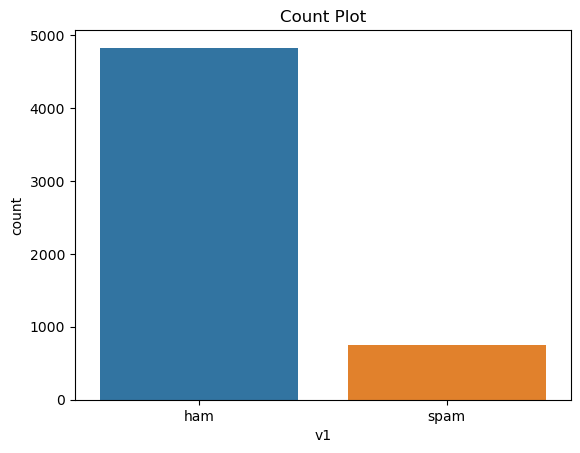

In [9]:
# DATA VISUALIZATION
sns.countplot(data=df, x='v1')
plt.xlabel('v1')
plt.ylabel('count')
plt.title('Count Plot')
plt.show()

In [10]:
df.loc[df["v1"] == "spam", "Category"] = 0
df.loc[df["v1"] == "ham", "Category"] = 1

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Category
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,1.0
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,1.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,0.0
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,1.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,1.0


In [11]:
X= df['v2']
y= df['Category']

In [12]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [13]:
y

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
5567    0.0
5568    1.0
5569    1.0
5570    1.0
5571    1.0
Name: Category, Length: 5572, dtype: float64

In [14]:
#DIVIDING THE DATA SET INTO TRAINING AND TEST DATASETS

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457,)
(1115,)
(4457,)
(1115,)


In [16]:
# Create a TF-IDF vectorizer to convert text messages into numerical features

from sklearn.feature_extraction.text import TfidfVectorizer


feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

y_train = y_train.astype("int")
y_test = y_test.astype("int")

In [17]:
# logistic regression model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_features, y_train)

LogisticRegression()

In [18]:
# Make predictions on training, testing data and To calculate the accuracy

from sklearn.metrics import accuracy_score

prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(y_test,prediction_on_test_data)


In [19]:

print('Accuracy on training data: {} %'.format(accuracy_on_training_data * 100))
print('Accuracy on test data: {} %'.format(accuracy_on_test_data * 100))

Accuracy on training data: 97.1729863136639 %
Accuracy on test data: 95.60538116591928 %


In [20]:
# Test the model with some custom email messages

input_mail = ["Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet."]

input_data_features = feature_extraction.transform(input_mail)
prediction = model.predict(input_data_features)

if (prediction)[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Ham Mail


In [21]:
input_mail = ["Please call our customer service representative on 0800 169 6031 between 10am-9pm as you have WON a guaranteed å£1000 cash or å£5000 prize!"]

input_data_features = feature_extraction.transform(input_mail)
prediction = model.predict(input_data_features)

if (prediction)[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")


Spam Mail


In [22]:
input_mail = ["GENT! We are trying to contact you. Last weekends draw shows that you won a å£1000 prize GUARANTEED. Call 09064012160. Claim Code K52. Valid 12hrs only. 150ppm"]

input_data_features = feature_extraction.transform(input_mail)
prediction = model.predict(input_data_features)

if (prediction)[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Spam Mail


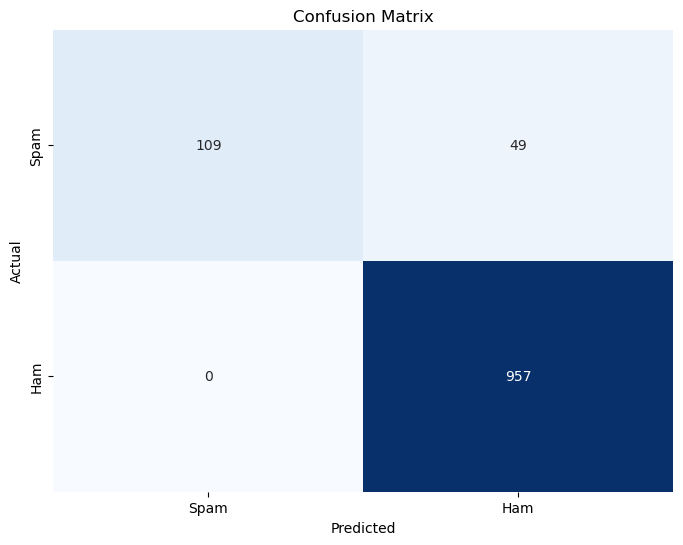

In [23]:
# Confusion Matrix Visualization

from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_test, prediction_on_test_data)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()